In [1]:
# wilds import
from wilds.common.data_loaders import get_train_loader, get_eval_loader
from wilds import get_dataset

import torchvision.transforms as transforms


import numpy as np


import matplotlib.pyplot as plt

/home/ubuntu/miniconda3/envs/alibitorchwhy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# datensatz camelyon laden
%cd  '/home/ubuntu/image-drift-monitoring'
%pwd
camelyon = get_dataset(dataset="camelyon17",download=False)

/home/ubuntu/image-drift-monitoring


In [4]:
# Get the training set (in distribution)
img_size = (96,96)
train_data = camelyon.get_subset("train",transform=transforms.Compose([transforms.Resize(img_size), transforms.ToTensor()]))
""" GET DATALOADER  & CREATE NUMPY DATASET WITH SIZE N (Standard Data Loader shuffles examples WILDS API)"""
N = 5000 # Size of Dataset
# N = int(train_data.__len__() /2 )
# N = 100000
train_loader= get_train_loader('standard',train_data,1)
train_ds = np.stack([tensor[0][0].numpy() for tensor ,i in zip(train_loader,range(N)) if i <N],axis=0)

print(train_ds.shape)

(5000, 3, 96, 96)


(3, 96, 96)


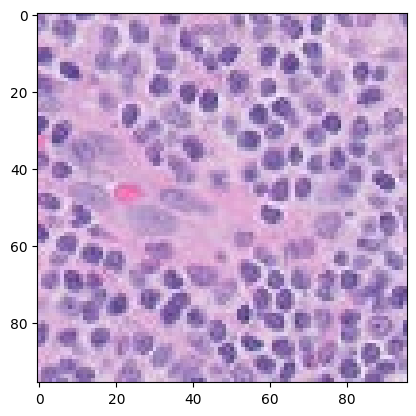

In [5]:
img_unchanged = train_ds[1]
print(img_unchanged.shape)
plt.imshow(np.transpose(img_unchanged,(1,2,0)))

In [11]:
from sklearn.decomposition import PCA

imgs = train_ds
print(imgs.shape)

img_transformed = np.reshape(imgs,(5000,27648))

print(img_transformed.shape)

print(img_transformed[1].min())
print(img_transformed[1].max())



(5000, 3, 96, 96)
(5000, 27648)
0.20392157
1.0


In [23]:
type(train_ds)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 96, 96)


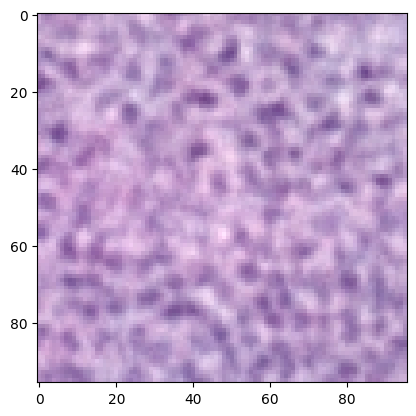

In [14]:
pca_500 = PCA(500)
x_ref_pca_500_reduced =pca_500.fit_transform(img_transformed)
x_ref_pca_500_recovered =pca_500.inverse_transform(x_ref_pca_500_reduced)
image_pca_500 = x_ref_pca_500_recovered[1,:].reshape(3,96,96)
print(image_pca_500.shape)
plt.imshow(np.transpose(image_pca_500,(1,2,0)))

(3, 96, 96)


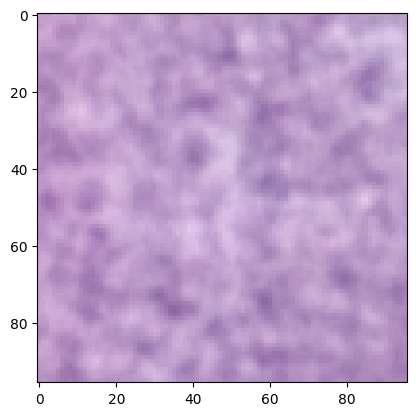

In [13]:
pca_200 = PCA(200)
x_ref_pca_200_reduced =pca_200.fit_transform(img_transformed)
x_ref_pca_200_recovered =pca_200.inverse_transform(x_ref_pca_200_reduced)
image_pca_200 = x_ref_pca_200_recovered[1,:].reshape(3,96,96)
print(image_pca_200.shape)
plt.imshow(np.transpose(image_pca_200,(1,2,0)))

In [ ]:
pca_96 = PCA(96)
x_ref_pca_96_reduced =pca_96.fit_transform(img_transformed)
x_ref_pca_96_recovered =pca_96.inverse_transform(x_ref_pca_96_reduced)

(3, 96, 96)


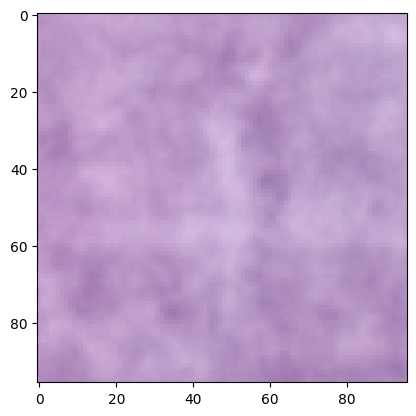

In [7]:
image_pca_96 = x_ref_pca_96_recovered[1,:].reshape(3,96,96)
print(image_pca_96.shape)
plt.imshow(np.transpose(image_pca_96,(1,2,0)))

In [9]:
pca_150 = PCA(150)
x_ref_pca_150_reduced =pca_150.fit_transform(img_transformed)
x_ref_pca_150_recovered =pca_150.inverse_transform(x_ref_pca_96_reduced)

(3, 96, 96)


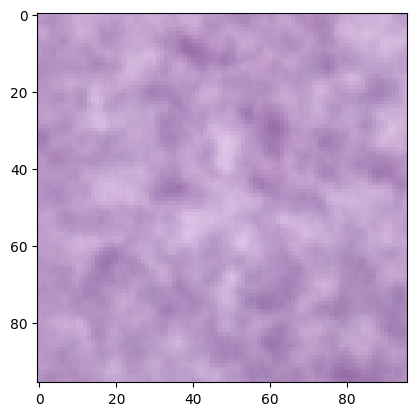

In [10]:
image_pca_150 = x_ref_pca_150_recovered[1,:].reshape(3,96,96)
print(image_pca_150.shape)
plt.imshow(np.transpose(image_pca_150,(1,2,0)))

In [16]:
images_pca_recon = []
for i in range(10,310,10):
    pca = PCA(i)
    x_ref_pca_reduced =pca.fit_transform(img_transformed)
    x_ref_pca_recovered =pca.inverse_transform(x_ref_pca_reduced)
    image_pca = x_ref_pca_recovered[1,:].reshape(3,96,96)
    print(image_pca.shape)
    images_pca_recon.append(np.transpose(image_pca,(1,2,0)))




(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)
(3, 96, 96)


KeyboardInterrupt: 

In [19]:
len(images_pca_recon)

18

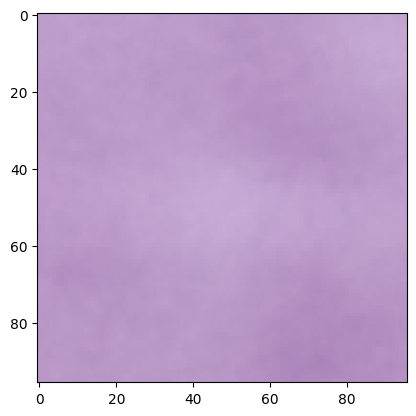

In [20]:
plt.imshow(images_pca_recon[0])

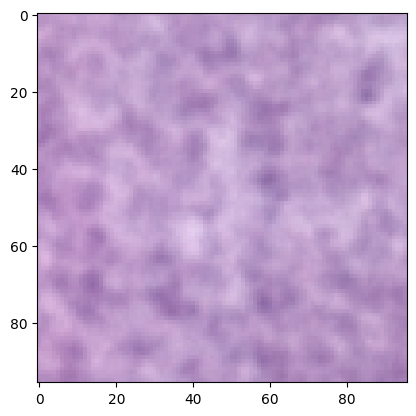

In [22]:
plt.imshow(images_pca_recon[17])

In [1]:
# my class
from pca import PCA

# numpy
import numpy as np

2023-02-03 12:06:21.379852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-03 12:06:21.379894: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/ubuntu/miniconda3/envs/alibitorchwhy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
myPCA = PCA()

LOAD DATA & SHUFFLE

In [3]:
%cd  '/home/ubuntu/image-drift-monitoring'
%pwd

camelyon_train_comp = np.load('camelyon_train_ds.npz')

camelyon_train = camelyon_train_comp['arr_0']

np.random.shuffle(camelyon_train)

/home/ubuntu/image-drift-monitoring


SPLIT DATA (First 50 --> PCA, Second 50 --> Drift Detector)

In [8]:
from sklearn.decomposition import PCA

newPCA = PCA(200)

shape = camelyon_train_first_50.shape
# TODO Flatten
camelyon_train_first_50 = np.reshape(camelyon_train_first_50,(shape[0],int(shape[1]*shape[2]*shape[3])))
camelyon_train_first_50.shape



(151218, 27648)

In [9]:
newPCA.fit(camelyon_train_first_50)

PCA(n_components=200)

In [16]:
newPCA.transform(camelyon_train_first_50)

array([[-2.4651425e+00,  2.5952733e+00, -3.4000711e+00, ...,
         8.1672955e-01,  7.4254405e-01, -1.2695661e-01],
       [-2.0785309e+01,  7.7939576e-01,  3.6311653e-01, ...,
        -8.3590961e-01,  3.0576840e-01, -2.5909868e-01],
       [-2.1327150e+01,  6.8995798e-01,  6.4192459e-02, ...,
        -8.4338593e-01,  1.4824096e+00,  3.5020235e-01],
       ...,
       [ 3.8215324e+01, -3.1634536e+00, -5.6235266e-01, ...,
        -2.6790050e-01, -1.2065287e+00,  2.8937924e-01],
       [ 3.8004894e+01, -3.3104556e+00,  2.3408443e-02, ...,
         1.2291611e+00,  3.8648117e-01, -1.3092953e+00],
       [ 2.2718395e+01, -8.4333652e-01, -1.8935424e+00, ...,
        -5.1611505e-02, -1.9084695e-01,  6.9045931e-01]], dtype=float32)

In [10]:
from alibi_detect.cd import KSDrift, MMDDrift

from alibi_detect.saving import save_detector, load_detector

from alibi_detect.cd.base import BaseUnivariateDrift

In [23]:
newPCA.transform

<bound method _BasePCA.transform of PCA(n_components=200)>

In [25]:
shape= camelyon_train_second_50.shape
camelyon_train_second_50_reshaped = np.reshape(camelyon_train_second_50,(shape[0],int(shape[1]*shape[2]*shape[3])))

In [26]:
detector = KSDrift(x_ref=camelyon_train_second_50_reshaped,p_val=0.05,preprocess_fn=newPCA.transform)

In [28]:
save_detector(detector=detector,filepath='/home/ubuntu/image-drift-monitoring/src/modules/alibi_detect/camelyon_pca_ks_151218')

Directory /home/ubuntu/image-drift-monitoring/src/modules/alibi_detect/camelyon_pca_ks_151218 does not exist and is now created.
Directory /home/ubuntu/image-drift-monitoring/src/modules/alibi_detect/camelyon_pca_ks_151218/preprocess_fn does not exist and is now created.


TEST PCA KS DETECTOR

In [4]:
import numpy as np
camelyon_test_comp = np.load('/home/ubuntu/image-drift-monitoring/data/camelyon17_v1.0/camelyon_test_ds.npz')

camelyon_test = camelyon_test_comp['arr_0']


In [5]:
camelyon_test.shape

(85054, 3, 96, 96)

In [6]:
shape = camelyon_test.shape
camelyon_test_reshaped = np.reshape(camelyon_test,(shape[0],int(shape[1]*shape[2]*shape[3])))

In [34]:
out =detector.predict(camelyon_test_reshaped)

In [40]:
len(out['data']['distance'])

200

In [43]:
out

{'data': {'is_drift': 1,
  'distance': array([0.26358894, 0.0655469 , 0.07212928, 0.29394022, 0.66078013,
         0.07533319, 0.22775018, 0.6497228 , 0.05255103, 0.05775287,
         0.0579157 , 0.0646088 , 0.1332198 , 0.06068551, 0.13109744,
         0.06507903, 0.08449013, 0.05167575, 0.0570926 , 0.04077012,
         0.0476866 , 0.0420511 , 0.05055071, 0.04942402, 0.04265467,
         0.05739618, 0.0384764 , 0.03213525, 0.04659227, 0.04290096,
         0.04453925, 0.04479191, 0.03932393, 0.04999772, 0.03139376,
         0.03127556, 0.04102528, 0.040185  , 0.04075426, 0.04398623,
         0.03986173, 0.04356992, 0.0459691 , 0.03673573, 0.03073156,
         0.03609815, 0.03692287, 0.03142991, 0.03795675, 0.03075014,
         0.03854284, 0.03878513, 0.0490558 , 0.03973355, 0.04143663,
         0.02915106, 0.03762906, 0.04462831, 0.04009925, 0.03793107,
         0.05326926, 0.03586322, 0.04315799, 0.03497681, 0.03161953,
         0.03536791, 0.04538492, 0.03542693, 0.02095655, 0.0330614

In [42]:
camelyon_val_comp = np.load('camelyon_val_ds.npz')

camelyon_val = camelyon_val_comp['arr_0']

In [ ]:
shape = camelyon_val.shape
camelyon_val_reshaped = np.reshape(camelyon_val,(shape[0],int(shape[1]*shape[2]*shape[3])))